## Tests for 1 Mean

### Exercise 

It is known that the average life time of Philips LEDs is 5000 hours. Your claim is that life time of Philips LEDs is less than 5000 hours. For this purpose, you bought 21 Philips LEDs and switch them on and observe the time when each of them stops working. Please test this claim with alpha = 0.05 level of significance.

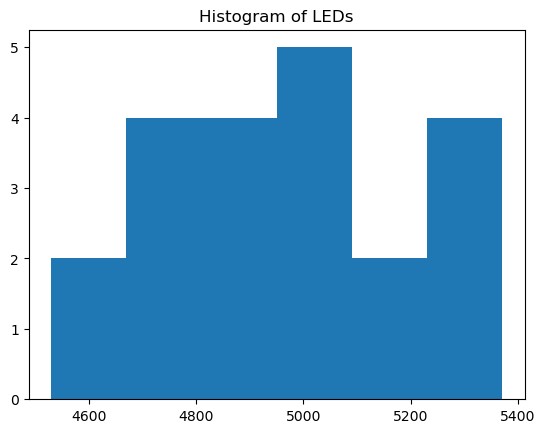

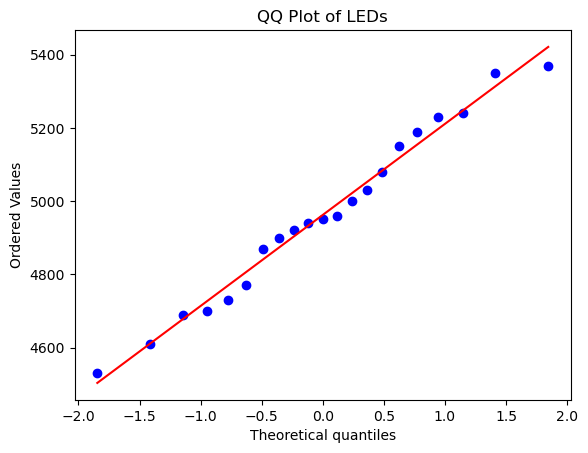

Shapiro-Wilk Test: W=0.9748423819996593, p-value=0.835941317255742
T-test: t-statistic=-0.15449041570423216, p-value=0.43938572634261397, df=20.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ttest_ind

# Set the random seed
np.random.seed(5233)

# Generate the sample
leds = np.random.choice(np.arange(4500, 5510, 10), 21, replace=False)

# Check normality - histogram
plt.hist(leds, bins='auto')
plt.title('Histogram of LEDs')
plt.show()

# Check normality - QQ plot
stats.probplot(leds, dist="norm", plot=plt)
plt.title('QQ Plot of LEDs')
plt.show()

# Check normality - Shapiro-Wilk test
shapiro_test = stats.shapiro(leds)
print(f'Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# T-test
t_stat, p_value, df = ttest_ind(leds, [5000], alternative='smaller')

# Reporting results
def report(results):
    print(f'T-test: t-statistic={results[0]}, p-value={results[1]}, df={results[2]}')

report((t_stat, p_value, df))

What is the final conclusion here???

Let's try to perform the power analysis.

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

effect_size = (np.mean(leds) - 5000) / np.std(leds, ddof=1)
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(leds), alpha=0.05, alternative='smaller')
print(f'Power of the test: {power}')

Power of the test: 0.12691598601824505


Ok, we may see the really poor power of this test. 
So what we need to change to increase the power significantly (i.e. 90%)?

In [4]:
required_n = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=0.05, alternative='smaller')
print(f'Required sample size for 90% power: {required_n}')

Required sample size for 90% power: 685.6804139017087


### Nonparametric approach

In case of small sample, unknown variance and quite skewed / not normal distribution of the variable (qqplots and Shapiro tests suggest rejection of normality) - we should use the less powerful substitute of t-tests: Wilcoxon Rank-based Test for 1 sample mean.

In [5]:
import numpy as np
from scipy.stats import wilcoxon

# Set the random seed
np.random.seed(5233)

# Generate the sample
leds = np.random.choice(np.arange(4500, 5510, 10), 21, replace=False)

# Calculate the differences from the hypothesized mean
differences = leds - 5000

# Filter out zero differences
non_zero_differences = differences[differences != 0]

# Perform the Wilcoxon test using normal approximation
if len(non_zero_differences) > 0:
    stat, p_value = wilcoxon(non_zero_differences, alternative='less', mode='approx')
    # Display the results
    print(f'Wilcoxon test: statistic={stat}, p-value={p_value}')

    # Conclusions
    if p_value < 0.05:
        print("We reject the null hypothesis: the mean value of 'leds' is less than 5000.")
    else:
        print("We do not have sufficient evidence to reject the null hypothesis.")
else:
    print("Not enough non-zero differences to perform the Wilcoxon test.")

Wilcoxon test: statistic=85.0, p-value=0.22759712672544208
We do not have sufficient evidence to reject the null hypothesis.


### Your turn

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

Please verify if the mean delivery time for medium quality pizzas is significantly lower than 25 minutes. Assume 0.01 level of significance. Check if the power of this test is satisfactory.

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/kflisikowski/ds/refs/heads/master/data_pizza.csv"
data_pizza = pd.read_csv(url)
print(data_pizza.head())

   Unnamed: 0  index        date  week  weekday         area  count rabate  \
0           1      1  2014-03-01   9.0      6.0       Camden    5.0   True   
1           2      2  2014-03-01   9.0      6.0  Westminster    2.0  False   
2           3      3  2014-03-01   9.0      6.0  Westminster    3.0  False   
3           4      4  2014-03-01   9.0      6.0        Brent    2.0  False   
4           5      5  2014-03-01   9.0      6.0        Brent    5.0   True   

    price operator   driver  delivery_min  temperature  wine_ordered  \
0  65.655   Rhonda   Taylor          20.0         53.0           0.0   
1  26.980   Rhonda  Butcher          19.6         56.4           0.0   
2  40.970  Allanah  Butcher          17.8         36.5           0.0   
3  25.980  Allanah   Taylor          37.3          NaN           0.0   
4  57.555   Rhonda   Carter          21.8         50.0           0.0   

   wine_delivered wrongpizza quality  
0             0.0      False  medium  
1             0.0   

In [12]:
medium_quality = data_pizza[data_pizza['quality'] == 'medium']
hypothesized_mean = 25
alpha = 0.01
t_stat, p_value = stats.ttest_1samp(medium_quality['delivery_min'], hypothesized_mean, alternative='less')
print(f'T-test: t-statistic={t_stat}, p-value={p_value}')
if p_value < alpha:
    print("We reject the null hypothesis: the mean delivery time for medium quality pizzas is less than 25 minutes.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

mean_delivered_time = medium_quality['delivery_min'].mean()
std_delivered_time = medium_quality['delivery_min'].std(ddof=1)
effect_size = (mean_delivered_time - hypothesized_mean) / std_delivered_time

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(medium_quality), alpha=alpha, alternative='smaller')
print(f'Power of the test: {power}')
if power < 0.9:
    required_n = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=alpha, alternative='smaller')
    print(f'Required sample size for 90% power: {required_n}')

T-test: t-statistic=2.840100009067062, p-value=0.997615067174318
We do not have sufficient evidence to reject the null hypothesis.
Power of the test: 7.428797637093823e-06
Required sample size for 90% power: [10.]


C:\Users\krzys\miniconda3\Lib\site-packages\statsmodels\stats\power.py:524: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


## Tests for 1 Variance and SD

1-sample variance and SD tests are not so popular. 

In [13]:
import numpy as np
import scipy.stats as stats

# Student data
students = np.array([12, 15, 4, 9, 6, 7, 11, 10, 13, 10])

# Calculate sample standard deviation
sample_sd = np.std(students, ddof=1)
print(f'Sample standard deviation: {sample_sd}')

# Test parameters
sigma = 3
n = len(students)
alpha = 0.01

# Chi-squared test for standard deviation
chi2_stat = (n - 1) * (sample_sd ** 2) / (sigma ** 2)
p_value = stats.chi2.cdf(chi2_stat, df=n-1)

print(f'Chi-squared statistic: {chi2_stat}')
print(f'p-value: {p_value}')

# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the standard deviation is less than 3.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Sample standard deviation: 3.3349995835415367
Chi-squared statistic: 11.122222222222224
p-value: 0.7325757902175853
We do not have sufficient evidence to reject the null hypothesis.


## Tests for 1 Proportion


### Exercise 3.

In case of large samples (np>5) we may use Z-tests for testing 1 proportions, but there is no built-in function for that (we may write our own...).

An auditor for the Online Service wants to examine its special two-hour priority order delivery to determine the proportion of the orders that actually arrive within the promised two-hour period. A randomly selected sample of 1500 such orders is found to contain 1150 that were delivered on time. 

Does the sample data provide evidence to conclude that the percentage of on-time orders is more than 75%? Test at 5% level of significance.

In [14]:
import numpy as np
import scipy.stats as stats

# Data
n = 1500  # number of orders
x = 1150  # number of orders delivered on time
p_hat = x / n  # proportion of orders delivered on time
p0 = 0.75  # hypothesized proportion
alpha = 0.05  # significance level

# Calculate the Z statistic
z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)
p_value = 1 - stats.norm.cdf(z_stat)  # one-tailed test

print(f'Z-statistic: {z_stat}')
print(f'p-value: {p_value}')

# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the proportion of on-time orders is greater than 75%.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Z-statistic: 1.4907119849998645
p-value: 0.06801856405707118
We do not have sufficient evidence to reject the null hypothesis.


Let's calculate the power for that test:

In [15]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import NormalIndPower

# Calculate the effect size
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the power of the test
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='larger')

print(f'Power of the test: {power}')

Power of the test: 0.2773402601448751


Calculate the required sample size for the desired power - at least 90%:

In [16]:
import numpy as np
from statsmodels.stats.power import NormalIndPower

# Data
x = 1150  # number of orders delivered on time
n = 1500  # initial number of orders
p_hat = x / n  # proportion of orders delivered on time
p0 = 0.75  # hypothesized proportion
alpha = 0.05  # significance level
desired_power = 0.90  # desired power

# Calculate the effect size
effect_size = (p_hat - p0) / np.sqrt(p0 * (1 - p0))

# Calculate the required sample size for the desired power
power_analysis = NormalIndPower()
required_n = power_analysis.solve_power(effect_size=effect_size, power=desired_power, alpha=alpha, alternative='larger')

print(f'Required sample size for 90% power: {required_n:.0f}')

Required sample size for 90% power: 11561


If the sample is just too small (np<5) please use the original binomial distribution instead:

In [8]:
import numpy as np
import scipy.stats as stats

# Data
n = 1500  # number of orders
x = 1150  # number of orders delivered on time
p0 = 0.75  # hypothesized proportion
alpha = 0.05  # significance level

# Check if np < 5
if n * p0 < 5:
    # Use binomial test
    p_value = stats.binom_test(x, n, p0, alternative='greater')
    print(f'Binomial test p-value: {p_value}')
else:
    # Use Z-test
    p_hat = x / n  # proportion of orders delivered on time
    z_stat = (p_hat - p0) / np.sqrt((p0 * (1 - p0)) / n)
    p_value = 1 - stats.norm.cdf(z_stat)  # one-tailed test
    print(f'Z-statistic: {z_stat}')
    print(f'Z-test p-value: {p_value}')

# Conclusions
if p_value < alpha:
    print("We reject the null hypothesis: the proportion of on-time orders is greater than 75%.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")

Z-statistic: 1.4907119849998645
Z-test p-value: 0.06801856405707118
We do not have sufficient evidence to reject the null hypothesis.


### Your turn

The dataset contains data of a pizza delivery service in London, delivering pizzas to three areas. Every record defines one order/delivery and the according properties. A pizza is supposed to taste good, if its temperature is high enough, say 45 Celsius. So it might be interesting for the pizza delivery service to minimize the delivery time.

Please test the claim if the proportion of the high quality pizzas (when delivered) is significantly different from 0.5. Assume significance level = 0.05.  

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import NormalIndPower


high_quality = data_pizza[data_pizza['quality'] == 'high'].count()
num_pizza = len(data_pizza)
num_high_quality = len(high_quality)
p_hat = num_high_quality / num_pizza
p0 = 0.5
alpha = 0.05

print(num_pizza)
print(num_high_quality)
print(p_hat)

z_stat, p_value = proportions_ztest(num_high_quality, num_pizza, p0, alternative='two-sided')

print(f'Z-statistic: {z_stat}, p-value: {p_value}')

if p_value < alpha:
    print("We reject the null hypothesis: the proportion of high quality pizzas is different from 0.5.")
else:
    print("We do not have sufficient evidence to reject the null hypothesis.")
effect_size = (p_hat-p0)/np.sqrt(p0*(1-p0))
power_analysis = NormalIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=num_pizza, alpha=alpha, alternative='two-sided')

print(f'Power of the test: {power}')

if power < 0.9:
    required_n = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=alpha, alternative='two-sided')
    print(f'Required sample size for 90% power: {required_n}')

1209
17
0.014061207609594707
Z-statistic: -143.5021582971682, p-value: 0.0
We reject the null hypothesis: the proportion of high quality pizzas is different from 0.5.
Power of the test: 1.0



Please write down your conclusions here.
Perform the power analysis for this test and provide a sample size for a power = 90% if not achieved here.
